# DSCI 525 - Web and Cloud Computing

***Milestone 4:*** In this milestone, you will deploy the machine learning model you trained in milestone 3.

Milestone 4 checklist :

- [x] Use an EC2 instance.
- [x] Develop your API here in this notebook.
- [x] Copy it to ```app.py``` file in EC2 instance.
- [x] Run your API for other consumers and test among your colleagues.
- [x] Summarize your journey.

In [3]:
## Import all the packages that you need
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## 1. Develop your API

rubric={mechanics:45}

You probably got how to set up primary URL endpoints from the ```sampleproject.ipynb notebook``` and have them process and return some data. Here we are going to create a new endpoint that accepts a POST request of the features required to run the machine learning model that you trained and saved in last milestone (i.e., a user will post the predictions of the 25 climate model rainfall predictions, i.e., features,  needed to predict with your machine learning model). Your code should then process this data, use your model to make a prediction, and return that prediction to the user. To get you started with all this, I've given you a template which you should fill out to set up this functionality:

***NOTE:*** You won't be able to test the flask module (or the API you make here) unless you go through steps in ```2. Deploy your API```. However, here you can make sure that you develop all your functions and inputs properly.

```python
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# 1. Load your model here
model = joblib.load("model.joblib")

# 2. Define a prediction function
def return_prediction(data):
    # format input_data here so that you can pass it to model.predict()
    return model.predict([data])[0]

# 3. Set up home page using basic html
@app.route("/")
def index():
    # feel free to customize this if you like
    return """
    <h1>Welcome to our rain prediction service</h1>
    To use this service, make a JSON post request to the /predict url with 5 climate model outputs.
    """

# 4. define a new route which will accept POST requests and return model predictions
@app.route('/predict', methods=['POST'])
def rainfall_prediction():
    content = request.json  # this extracts the JSON content we sent
    prediction = return_prediction(content["data"])
    results = {"input": content["data"],
               "prediction": prediction}
    return jsonify(results)

if __name__ == "__main__":
    app.run(host='0.0.0.0', port=8080)
```

## 2. Deploy your API

rubric={mechanics:40}

Once your API (app.py) is working we're ready to deploy it! For this, do the following:

1. SSH into your EC2 instance from milestone2. There are no issues if you want to spin another EC2 instance; if you plan to do so, make sure you terminate any other running instances.
2. Make a file `app.py` file in your instance and copy what you developed above in there. 

    2.1 You can use the linux editor using ```vi```. More details on vi Editor [here](https://www.guru99.com/the-vi-editor.html). I do recommend doing it this way and knowing some basics like ```:wq,:q!,dd``` will help.
    
    2.2 Or else you can make a file in your laptop called app.py and copy it over to your EC2 instance using ```scp```. Eg: ```scp -r -i "ggeorgeAD.pem" ~/Desktop/worker.py  ubuntu@ec2-xxx.ca-central-1.compute.amazonaws.com:~/```

3. Download your model from s3 to your EC2 instance.
4. Presumably you already have `pip` or `conda` installed on your instance from your previous milestone. You should use one of those package managers to install the dependencies of your API, like `flask`, `joblib`, `sklearn`, etc.

    4.1. You have installed it in your TLJH using [Installing pip packages](https://tljh.jupyter.org/en/latest/howto/env/user-environment.html#installing-pip-packages). if you want to make it available to users outside of jupyterHub (which you want to in this case as we are logging into EC2 instance as user ```ubuntu``` by giving ```ssh -i privatekey ubuntu@<host_name>```) you can follow these [instructions](https://tljh.jupyter.org/en/latest/howto/env/user-environment.html#accessing-user-environment-outside-jupyterhub).
    
    4.2. Alternatively you can install the required packages inside your terminal.
        - Install conda:
            wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
            bash Miniconda3-latest-Linux-x86_64.sh
        - Install packages (there might be others): 
            conda install flask scikit-learn joblib

5. Now you're ready to start your service, go ahead and run `flask run --host=0.0.0.0 --port=8080`. This will make your service available at your EC2 instance's IP address on port 8080. Please make sure that you run this from where ```app.py``` and ```model.joblib``` resides.
6. You can now access your service by typing your EC2 instances public IPv4 address appened with `:8080` into a browswer, so something like `http://<your_EC2_ip>:8080`.
7. You should use `curl` to send a post request to your service to make sure it's working as expected.
>EG: curl -X POST http://your_EC2_ip:8080/predict -d '{"data":[1,2,3,4,53,11,22,37,41,53,11,24,31,44,53,11,22,35,42,53,12,23,31,42,53]}' -H "Content-Type: application/json"

8. Now, what happens if you exit your connection with the EC2 instance? Can you still reach your service?
9. There are several options we could use to help us persist our server even after we exit our shell session. We'll be using `screen`. `screen` will allow us to create a separate session within which we can run `flask` and which won't shut down when we exit the main shell session. Read [this](https://linuxize.com/post/how-to-use-linux-screen/) to learn more on ```screen```.
10. Now, create a new `screen` session (think of this as a new, separate shell), using: `screen -S myapi`. If you want to list already created sessions do ```screen -list```. If you want to get into an existing ```screen -x myapi```.
11. Within that session, start up your flask app. You can then exit the session by pressing `Ctrl + A then press D`. Here you are detaching the session, once you log back into EC2 instance you can attach it using ```screen -x myapi```.
12. Feel free to exit your connection with the EC2 instance now and try accessing your service again with `curl`. You should find that the service has now persisted!
13. ***CONGRATULATIONS!!!*** You have successfully got to the end of our milestones. Move to Task 3 and submit it.

## 3. Summarize your journey from Milestone 1 to Milestone 4
rubric={mechanics:10}
>There is no format or structure on how you write this. (also, no minimum number of words).  It's your choice on how well you describe it.

Milestone 1 (Running big data modeling locally):

- During milestone 1, we found that it is very challenging to work with big dataset on our local machines using the standard libraries and file formats we used frequently in MDS. It was a resource intensive task to process large volume of data. The time required to run the process was heavily dependent on system resources. We were not able to run our analysis in some systems with relatively lower configurations. We explored Dask as an alternative to pandas to load and wrangle data. It allowed us to process data in specific chunk size for only those columns which were of interest. We also explored other file formats like parquet, arrow and feather in addition to csv and ended up using feather format as it was much faster, less resource hungry than other formats and easy to work with when passing data frames from python to R kernel within the same notebook.

Milestone 2 (Setting up EC2 and S3 in AWS):

- After the resource issues encountered while working with big data on our local systems in milestone 1, milestone 2 focused on alleviating these issues through migration to a cloud computing environment. The cloud ecosystem chosen by the program to teach these skills was the AWS suite of services, where we were assigned MDS student IAM accounts to run EC2 cloud computing instances integrated with the S3 storage service. The first roadblock we faced in the cloud migration of our system was actually due to bandwidth limitations within the MDS AWS account environment, as the large volume of students spinning up EC2 instances during lab time exceeded the account limits. This rate-limiting manifested itself as intermittent failures as the resources were exhausted, until the load receded and the instructor was thankfully able to resolve the issue moving forward. Following this, we were able to successfully launch our EC2 instance with ‘The Littlest JupyterHub’ (TLJH) to continue our model development. After some initial tinkering with temperamental user server keys and permission settings, all group members were able to access the EC2 server and JupyterHub instance and we transferred our local notebook code to the TLJH server. The next step was to create an S3 bucket to store the large weather observation data objects required by our modeling pipeline that were so cumbersome to manage locally. The JupyterHub EC2 instance was able to seamlessly retrieve the parquet data within the S3 bucket with only an additional AWS credential object, and we were able to complete some additional data wrangling to prepare for the next milestone. To summarize our efforts in this milestone, we were able to migrate and expand upon our local machine learning pipeline implementation approach to the cloud with a bit of additional setup work and troubleshooting! Crucially, we’re now able to leverage scalable resources, a dedicated server instance, and shared working environment to accelerate and improve our rain prediction service in the following milestones!

Milestone 3 (Training a model with spark's MLlib):

- After uploading the data to an S3 bucket, a model to predict the observations using the features in the dataset was desired. Due to the large size of the data, training the model on a local machine would have taken a long time. For this reason, the decision to train the model on an EMR cluster was made.
Setting up the EMR cluster was pretty straightforward. Still, additional setups on the browser and connecting to the SSH tunnel had some complications. Based on the operating system of each groupmate, the solution to fix those problems was unique. Following the successful connection to the cluster, a Random Forest with only one set of hyperparameters was trained, and this single training took a few minutes to complete. But training only one model is not a desirable thing to do because there might be other hyperparameter settings that return much better results.
The long training time validated the need to use spark to speed up the training process because we needed to do hyperparameter optimization. The Data was transformed into a desirable format for spark and then crossvalidation was carried out and the best hyperparameter setting out of 12 possible settings was chosen. Using those hyperparameters an sklearn model was trained and saved for later prediction uses.

Milestone 4 (Deploying pretrained model to Flask server):

- In this milestone, we deployed the pretrained rainfall prediction machine learning model on EC2 instance using the Flask package. Our model is saved from the milestone 3 sklearn random forest model output as a joblib file. The Flask server loads the pretrained model and reads the user test data for predicting a rainfall floating point value. With the REST API written in Flask, users can send a HTTP POST request to our website and use our model to predict rainfall. The returned object will be sent as JSON file for the user to process and save results. This milestone gives us the high-level understanding of how to deploy a machine learning model on AWS. 

## 4. Submission instructions
rubric={mechanics:5}

In the textbox provided on Canvas please put a link where TAs can find the following-
- [x] This notebook with solution to ```1 & 3```
- [x] Screenshot from 
    - [x] Output after trying curl. Here is a [sample](https://github.ubc.ca/MDS-2020-21/DSCI_525_web-cloud-comp_students/blob/master/Milestones/milestone4/images/curl_deploy_sample.png). This is just an example; your input/output doesn't have to look like this, you can design the way you like. But at a minimum, it should show your prediction value.
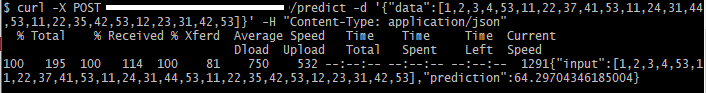